In [ ]:
# Accuracy and Confusion Matrix Using Scikit-Learn & Seaborn
# https://proclusacademy.com/blog/practical/confusion-matrix-accuracy-sklearn-seaborn/

# ROC AUC
# https://www.evidentlyai.com/classification-metrics/explain-roc-curve#:~:text=ROC%20AUC%20score%20shows%20how,have%20an%20AUC%20of%200.5.

In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv("framingham.csv")

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [21]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [22]:
df.drop(columns=['education'], inplace=True)

In [23]:
# drop all missing values

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [26]:
df.shape

(3751, 15)

In [27]:
df['TenYearCHD'].value_counts()

0    3179
1     572
Name: TenYearCHD, dtype: int64

In [28]:
df['TenYearCHD'].value_counts(normalize=True) * 100

0    84.750733
1    15.249267
Name: TenYearCHD, dtype: float64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

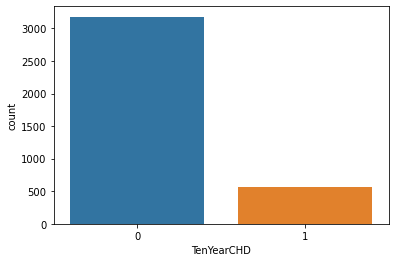

In [29]:
sns.countplot(data=df, x='TenYearCHD')

In [30]:
# sns.pairplot(data=df)

<AxesSubplot:>

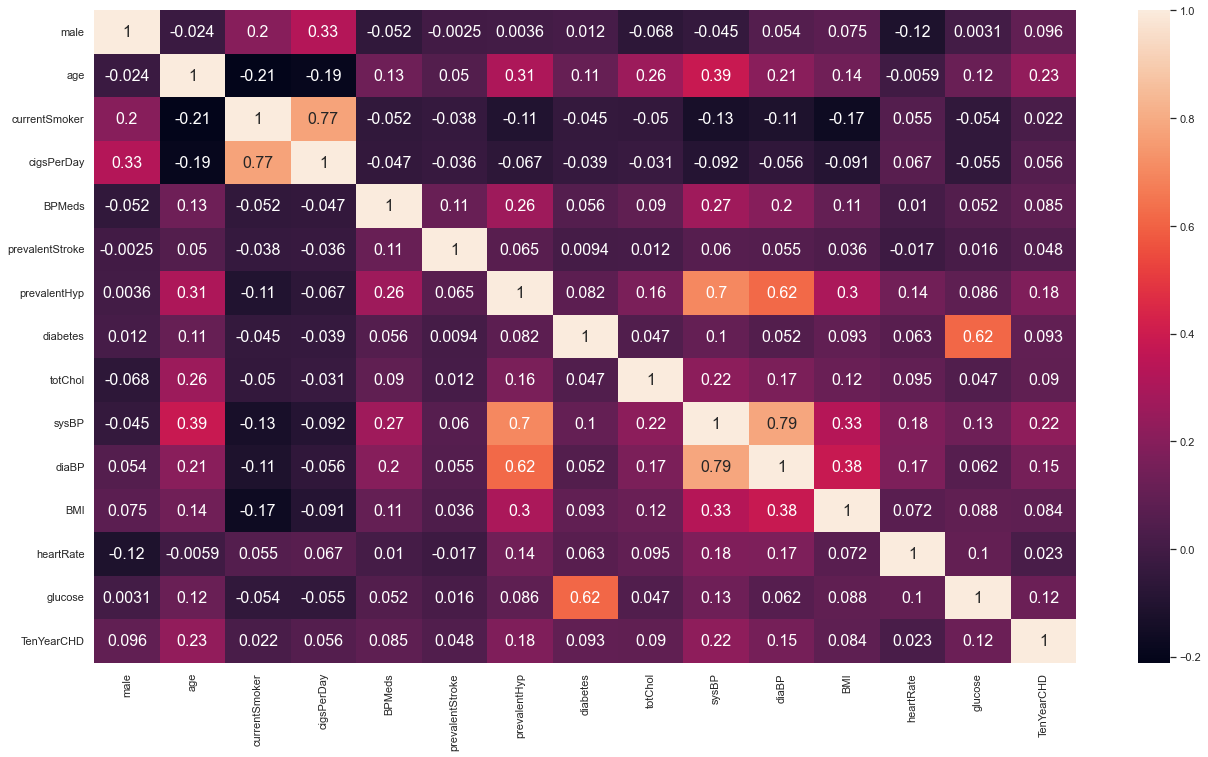

In [34]:
sns.set(rc = {'figure.figsize':(22,12)})
sns.heatmap(df.corr(), annot=True, annot_kws={'size':16})

In [35]:
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log = LogisticRegression()

In [39]:
log.fit(X_train, y_train)

C:\Users\go27s\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [40]:
y_pred = log.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test, y_pred)

0.8308921438082557

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix                               

array([[616,   6],
       [121,   8]], dtype=int64)

In [48]:
display = ConfusionMatrixDisplay(conf_matrix, display_labels=log.classes_)

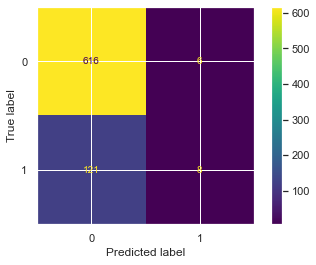

In [55]:
display.plot()

In [58]:
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc_score(y_test,y_pred)

0.5261846008125827

In [59]:
def plot_roc_curve(true_y, pred_y):
    fpr, tpr, thresholds = roc_curve(true_y, pred_y)
    plt.plot(fpr,tpr)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

model 1 AUC score: 0.5261846008125827


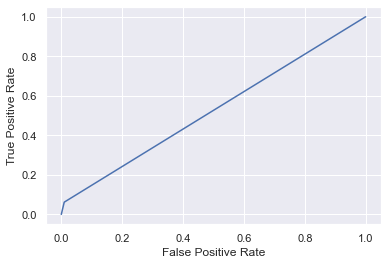

In [61]:
plot_roc_curve(y_test, y_pred)
print(f'model 1 AUC score: {roc_auc_score(y_test, y_pred)}')